### Step 1: Importing Libraries and Dataset.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [17]:
print("\n--- Dataset Information ---")
print(df.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


### Step 2: Preprocessing - Label Encoding.

In [18]:
# REAL becomes 1, FAKE becomes 0
df['label_num'] = df['label'].map({'REAL': 1, 'FAKE': 0})

In [19]:
# 2. Check the first few rows to see the new column
print("--- Updated Dataset with Numerical Labels ---")
print(df[['label', 'label_num']].head())

--- Updated Dataset with Numerical Labels ---
  label  label_num
0  FAKE          0
1  FAKE          0
2  REAL          1
3  FAKE          0
4  REAL          1


In [20]:
# 3. Check the count to make sure it worked for everything
print("\n--- Count of each label ---")
print(df['label_num'].value_counts())


--- Count of each label ---
label_num
1    3171
0    3164
Name: count, dtype: int64


### Step 3: Text Cleaning

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download the list of common stopwords (only need to do this once)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Convert to lowercase
    text = str(text).lower()
    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Remove stopwords (words like 'is', 'the', 'at')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to our dataset
print("Cleaning text... this may take a moment...")
df['clean_text'] = df['text'].apply(clean_text)

# Look at the results
print("\n--- Comparison ---")
print("Original:", df['text'].iloc[0][:100], "...")
print("Cleaned: ", df['clean_text'].iloc[0][:100], "...")

Cleaning text... this may take a moment...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Comparison ---
Original: Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing ...
Cleaned:  daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam f ...


### Step 4: Splitting the Dataset.

In [22]:
# 'X' is the input (the cleaned news text)
X = df['clean_text']

# 'y' is the output/target (the numerical labels: 0 or 1)
y = df['label_num']

# Now we split them!
# test_size=0.2 means we keep 20% for testing.
# random_state=42 is a 'seed' that ensures we get the same split every time we run it.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Split Complete ---")
print(f"Total articles in dataset: {len(df)}")
print(f"Articles for Training (X_train): {len(X_train)}")
print(f"Articles for Testing (X_test):   {len(X_test)}")

--- Data Split Complete ---
Total articles in dataset: 6335
Articles for Training (X_train): 5068
Articles for Testing (X_test):   1267


### Step 5: Tokenization and Padding.

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Setup the parameters
vocab_size = 10000  # We will only keep the 10,000 most frequent words
max_length = 500    # We will make every article exactly 500 words long
trunc_type = 'post' # If an article is longer than 500, cut off the end
padding_type = 'post' # If shorter than 500, add zeros at the end
oov_tok = "<OOV>"   # A special 'Out Of Vocabulary' token for words we don't know

# 2. Initialize the Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# 3. Fit the tokenizer on the training data ONLY
# (We don't want it to 'see' the test data yet)
tokenizer.fit_on_texts(X_train)

# 4. Convert text to sequences of numbers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# 5. Pad the sequences so they are all the same length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print("--- Tokenization & Padding Complete ---")
print(f"Shape of training data: {X_train_padded.shape}")
print("Example of a padded article (first 10 numbers):")
print(X_train_padded[0][:10])

--- Tokenization & Padding Complete ---
Shape of training data: (5068, 500)
Example of a padded article (first 10 numbers):
[  44    3  648  399 1714  342 1495  247 2601 3560]


### Step 6: Building the Neural Network.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model architecture
model = Sequential([
    # 1. Embedding Layer: vocab_size is 10000, embedding_dim is 16
    Embedding(vocab_size, 16, input_length=max_length),
    
    # 2. LSTM Layer: 64 units to 'remember' patterns
    LSTM(64),
    
    # 3. Dense Layer: A middle-man to process the LSTM output
    Dense(24, activation='relu'),
    
    # 4. Dropout: This randomly 'turns off' some neurons during training 
    # to prevent the model from just memorizing (overfitting)
    Dropout(0.2),
    
    # 5. Output Layer: Sigmoid gives a value between 0 and 1
    Dense(1, activation='sigmoid')
])

# Compile the model
# optimizer='adam' is like a smart teacher that helps the model learn faster
# loss='binary_crossentropy' is the standard for 0 or 1 classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show the summary of the model
model.summary()

d:\Inlinetech-Internship\Fack_News_Detection\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 7: Training the Model.

In [25]:
# Train the model
# epochs=5 means the model will go through the whole dataset 5 times
history = model.fit(
    X_train_padded, 
    y_train, 
    epochs=10,
    validation_data=(X_test_padded, y_test),
    verbose=1
)

print("\n--- Training Complete! ---")

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.6245 - loss: 0.6561 - val_accuracy: 0.7435 - val_loss: 0.5530
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 37s 234ms/step - accuracy: 0.5247 - loss: 0.6877 - val_accuracy: 0.5935 - val_loss: 0.6821
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 34s 211ms/step - accuracy: 0.5807 - loss: 0.6759 - val_accuracy: 0.6069 - val_loss: 0.6679
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 37s 233ms/step - accuracy: 0.5888 - loss: 0.6707 - val_accuracy: 0.5967 - val_loss: 0.6668
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 39s 244ms/step - accuracy: 0.5866 - loss: 0.6678 - val_accuracy: 0.5556 - val_loss: 0.6804
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 38s 240ms/step - accuracy: 0.6677 - loss: 0.6176 - val_accuracy: 0.8264 - val_loss: 0.4546
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.6681 - loss: 0.5990 - val_accuracy: 0.6125 - val_loss: 0.6792
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 39s 248ms/step - accuracy: 0.6859 - loss: 0

### Step 8: Visualizing the Results.

--- Accuracy Graph ---


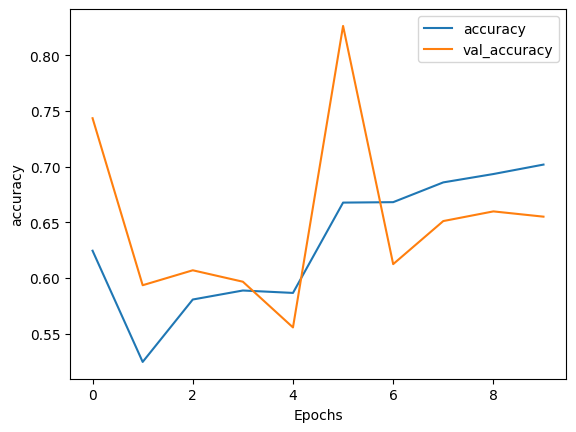

--- Loss Graph ---


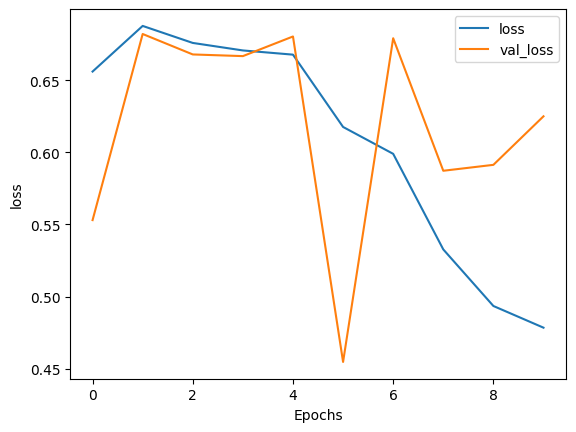

In [26]:
# Create a function to plot the results
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot Accuracy
print("--- Accuracy Graph ---")
plot_graphs(history, "accuracy")

# Plot Loss
print("--- Loss Graph ---")
plot_graphs(history, "loss")

### Step 9: Testing with Your Own News!

In [27]:
def predict_news(news_text):
    # 1. Clean the input text
    cleaned_input = clean_text(news_text)
    
    # 2. Convert to sequence and pad
    sequence = tokenizer.texts_to_sequences([cleaned_input])
    padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    # 3. Get prediction (a number between 0 and 1)
    prediction = model.predict(padded)
    
    # 4. Interpret the result
    if prediction[0] > 0.5:
        return f"REAL (Confidence: {prediction[0][0]*100:.2f}%)"
    else:
        return f"FAKE (Confidence: {(1-prediction[0][0])*100:.2f}%)"

# --- TEST IT OUT ---
# Example 1: A clearly sensational/fake style headline
test_1 = "Aliens have landed in Central Park and are handing out free gold bars to everyone!"
print(f"Result 1: {predict_news(test_1)}")

# Example 2: A standard-sounding news snippet
test_2 = "The government announced new changes to the tax laws starting next fiscal year."
print(f"Result 2: {predict_news(test_2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
Result 1: FAKE (Confidence: 58.62%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Result 2: FAKE (Confidence: 58.62%)


In [28]:
# --- THE TESTING STATION ---

# 1. Paste the FULL TEXT of a news article between the triple quotes below
# I have put the John Kerry news snippet here as an example of REAL news
my_test_article = """
U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris 
later this week, amid criticism that no top American officials attended 
Sunday’s unity march against terrorism. Kerry said he expects to arrive in 
Paris Thursday evening, as he heads home after a week abroad.
"""

# 2. Run the prediction function on your variable
result = predict_news(my_test_article)

# 3. Print the final verdict
print(f"THE MODEL SAYS: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
THE MODEL SAYS: FAKE (Confidence: 58.62%)


### Rebuilding a "Stable" Model

In [ ]:
from tensorflow.keras.layers import Bidirectional, GlobalAveragePooling1D

# 1. Re-define a more stable model
model = Sequential([
    # Embedding turns word IDs into meaningful vectors
    Embedding(vocab_size, 16, input_length=max_length),
    
    # Bidirectional LSTM reads the text in both directions
    # We use 32 units (instead of 64) to keep it simple and avoid confusion
    Bidirectional(LSTM(32, return_sequences=True)),
    
    # GlobalAveragePooling1D helps the model look at the 'big picture' 
    # of the whole article at once
    GlobalAveragePooling1D(),
    
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# 2. Use a slightly slower learning rate to keep it stable
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Show the summary of the model
model.summary()

# 3. Re-train the model
# Let's try 7 epochs this time—a sweet spot between 5 and 10
print("Starting Stable Training...")
history = model.fit(
    X_train_padded, 
    y_train, 
    epochs=7, 
    validation_data=(X_test_padded, y_test),
    verbose=1
)

print("\n--- Training Complete! ---")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Starting Stable Training...
Epoch 1/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.7455 - loss: 0.5232 - val_accuracy: 0.8421 - val_loss: 0.3782
Epoch 2/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.8688 - loss: 0.3517 - val_accuracy: 0.8721 - val_loss: 0.3503
Epoch 3/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.8818 - loss: 0.3288 - val_accuracy: 0.8824 - val_loss: 0.3118
Epoch 4/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.9102 - loss: 0.2580 - val_accuracy: 0.8903 - val_loss: 0.2869
Epoch 5/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.9375 - loss: 0.1807 - val_accuracy: 0.9045 - val_loss: 0.2903
Epoch 6/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - accuracy: 0.9534 - loss: 0.1400 - val_accuracy: 0.9053 - val_loss: 0.2591
Epoch 7/7
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.9676 - loss: 0.0930 - val_accuracy: 0.9148 - val_loss: 0.2849

--- Training Complete! ---


--- Stable Model: Accuracy Curve ---


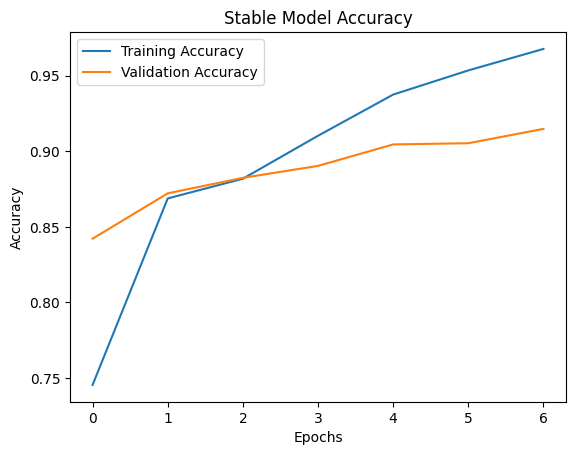

--- Stable Model: Loss Curve ---


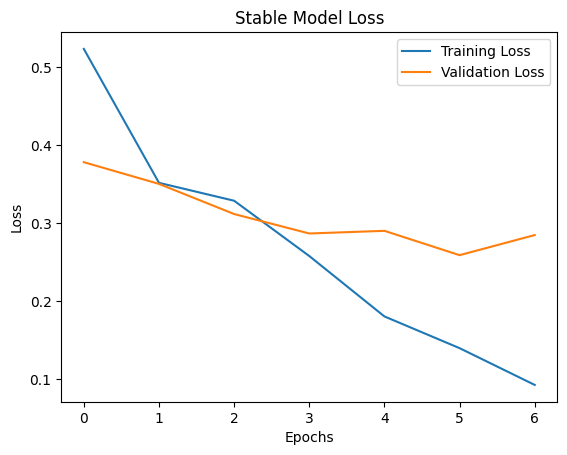

In [30]:
# Plot Accuracy for the Stable Model
print("--- Stable Model: Accuracy Curve ---")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Stable Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss for the Stable Model
print("--- Stable Model: Loss Curve ---")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Stable Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


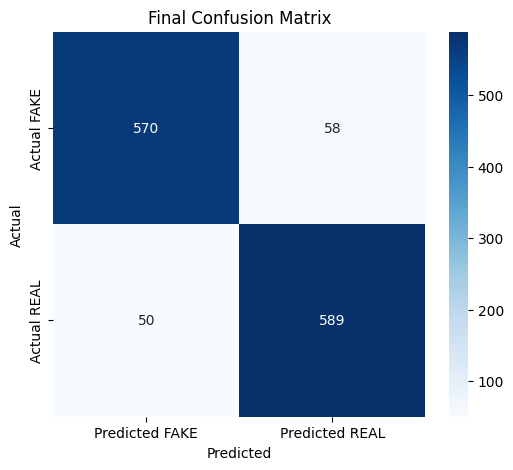


--- Detailed Classification Report ---
              precision    recall  f1-score   support

        FAKE       0.92      0.91      0.91       628
        REAL       0.91      0.92      0.92       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Get the model's predictions for the test set
# The model gives numbers like 0.98, so we round them to 0 or 1
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")

# 2. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot it using Seaborn (a graphing library)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted FAKE', 'Predicted REAL'],
            yticklabels=['Actual FAKE', 'Actual REAL'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Final Confusion Matrix')
plt.show()

# 4. Print the text report (Precision, Recall, F1-Score)
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

In [54]:
def final_verify(text, label_type):
    # Process the text
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    # Predict
    prob = model.predict(padded)[0][0]
    verdict = "REAL" if prob > 0.5 else "FAKE"
    confidence = prob if prob > 0.5 else (1 - prob)
    
    print(f"Testing {label_type} Content...")
    print(f"Result: {verdict} ({confidence*100:.2f}% confidence)")
    print("-" * 30)

# --- TEST 1: High-Quality Journalism (Real) ---
real_news = """
The Federal Reserve signaled on Wednesday that it expects to keep interest rates 
steady for the remainder of the year. Officials cited a cooling labor market 
and a gradual decline in inflation as primary reasons for the pause.
"""

# --- TEST 2: Typical "Clickbait/Fake" Style ---
fake_news = """
BREAKING: Secret documents found in a basement prove that the moon is actually 
a giant hologram projected by a secret society. Everyone needs to wake up 
now before the projector is turned off!
"""

final_verify(real_news, "REAL")
final_verify(fake_news, "FAKE")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Testing REAL Content...
Result: REAL (79.68% confidence)
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Testing FAKE Content...
Result: FAKE (94.82% confidence)
------------------------------


In [55]:
import pickle

# 1. Save the actual Neural Network "Brain"
# This file contains the architecture and the learned weights
# Save using the modern native Keras format
model.save('fake_news_detector.keras')
print("✅ Model saved as 'fake_news_detector.keras'")

# 2. Save the Tokenizer "Dictionary"
# This ensures we use the exact same word-to-number mapping later
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("✅ Tokenizer saved as 'tokenizer.pickle'")

✅ Model saved as 'fake_news_detector.keras'
✅ Tokenizer saved as 'tokenizer.pickle'
